## Working with a larger example (multiclass classification)

When you have more than two classes as an option, this is known as multiclass classification.

We will use the tensorflow known as [Fashion MNIST built-in](https://github.com/zalandoresearch/fashion-mnist)

We can import it using the tf.keras.datasets module.



In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()
# The data has already been sorted into training and test sets for us

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Checking the first example

print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [4]:
print(train_labels[0])


9


It looks like our labels are in numerical form. And while this is fine for a neural network, you might want to have them in human readable form.

Let's create a small list of the class names (we can find them on [the dataset's GitHub page](https://github.com/zalandoresearch/fashion-mnist#labels) .)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Lets see  first sample

In [6]:
print(train_data[0])
print(test_labels[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
print(class_names[train_labels[0]])

Ankle boot


In [8]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
train_data[0].shape

(28, 28)

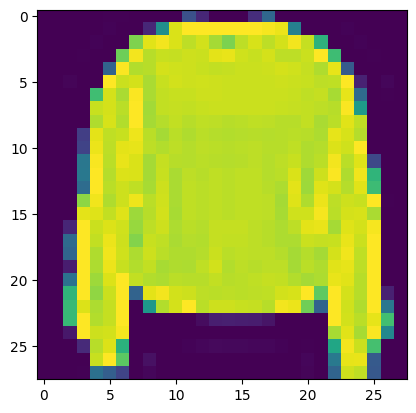

In [10]:
# plot  a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [11]:
# Label
class_names[train_labels[7]]

'Pullover'

Text(0.5, 1.0, 'Dress')

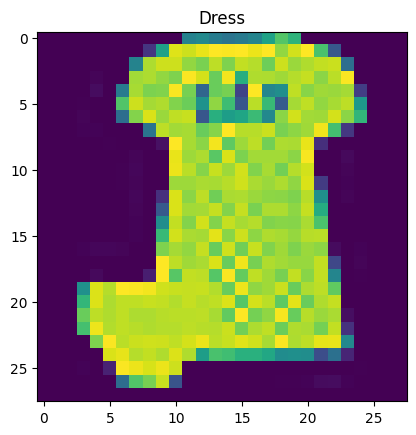

In [12]:
plt.imshow(train_data[70])
plt.title(class_names[train_labels[70]])

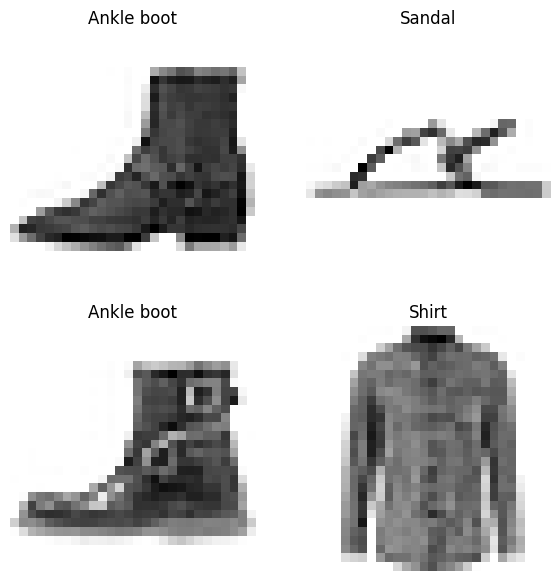

In [13]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_i = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_i], cmap=plt.cm.binary)  # Black and white color
  plt.title(class_names[train_labels[rand_i]])
  plt.axis(False)

## Creating the model

* The input shape will have to deal with 28x28 tensors (the height and width of our images).
We're actually going to squash the input into a tensor (vector) of shape (784).

* The output shape will have to be 10 because we need our model to predict for 10 different classes.
** We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.

* We'll need to change our loss function from a binary loss function to a multiclass loss function.
** More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().


In [14]:
# set random seed
tf.random.set_seed(42)

# creat the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),   # Flatten the shape to 28*28 =784 (input layer )
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax) # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test_data



Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.2444 - accuracy: 0.1408 - val_loss: 1.8573 - val_accuracy: 0.2067
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7255 - accuracy: 0.2652 - val_loss: 1.6401 - val_accuracy: 0.3222
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6175 - accuracy: 0.3230 - val_loss: 1.5939 - val_accuracy: 0.3248
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5669 - accuracy: 0.3413 - val_loss: 1.5350 - val_accuracy: 0.3531
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4900 - accuracy: 0.3765 - val_loss: 1.3656 - val_accuracy: 0.4503
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3065 - accuracy: 0.4470 - val_loss: 1.2871 - val_accuracy: 0.4495
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.2548 - accuracy: 0.4554 - val_loss: 1.2848 - val_accuracy:

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Accuracy of ~50%
 But the data is not normalised, (tensors between (0, 1),



In [16]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

So we have to normalise the data from 0, 1

(scaling or normalization)



In [17]:
train_data = train_data / 255.0
test_data = test_data / 255.0

train_data.min(), train_data.max()


(0.0, 1.0)

Lets use this data in the same model as model_1

In [18]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.1356 - accuracy: 0.6087 - val_loss: 0.8399 - val_accuracy: 0.7133
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7442 - accuracy: 0.7293 - val_loss: 0.7617 - val_accuracy: 0.7301
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6694 - accuracy: 0.7533 - val_loss: 0.6776 - val_accuracy: 0.7420
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6352 - accuracy: 0.7698 - val_loss: 0.6516 - val_accuracy: 0.7658
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6140 - accuracy: 0.7786 - val_loss: 0.6654 - val_accuracy: 0.7636
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5984 - accuracy: 0.7836 - val_loss: 0.6355 - val_accuracy: 0.7736
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5893 - accuracy: 0.7867 - val_loss: 0.6483 - val_accuracy:

Accuracy increased after the normalisation ,around 80%

<Axes: title={'center': 'Normalised'}>

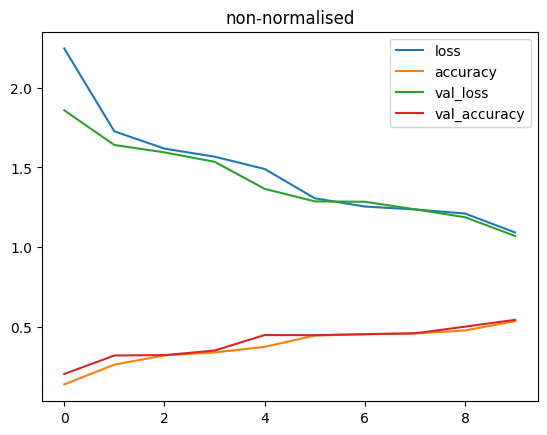

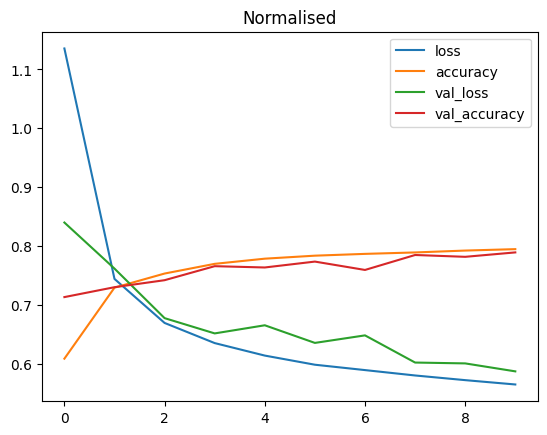

In [19]:
import pandas as pd

# non-normalised
pd.DataFrame(non_norm_history.history).plot(title="non-normalised")

# normalised
pd.DataFrame(norm_history.history).plot(title="Normalised")



## Evaluating the model

In [20]:
y_preds = model_2.predict(test_data)
y_preds[:5]

313/313 [==============================] - 0s 912us/step


array([[6.30922848e-03, 1.31158705e-03, 3.37220758e-04, 4.49729292e-03,
        4.24096506e-04, 4.00614977e-01, 3.62103153e-03, 4.69980128e-02,
        8.10427405e-03, 5.27782321e-01],
       [5.55370701e-03, 7.51270548e-08, 7.14383006e-01, 9.04646367e-05,
        4.33534719e-02, 6.46917386e-30, 2.36619219e-01, 2.52530626e-24,
        1.04346178e-07, 1.65206421e-34],
       [2.27064412e-08, 9.99526381e-01, 3.98436709e-12, 3.75454518e-04,
        8.25446768e-05, 3.28323375e-11, 1.98943368e-08, 1.01389885e-18,
        1.55726302e-05, 2.94700095e-28],
       [4.92038019e-08, 9.98096704e-01, 3.63646353e-12, 1.86755613e-03,
        2.61064743e-05, 1.15172316e-10, 2.34585897e-08, 3.04285895e-18,
        9.48005800e-06, 4.36233819e-25],
       [1.75212175e-01, 3.43753578e-04, 2.00237259e-01, 4.12941165e-02,
        4.28076908e-02, 3.57477855e-13, 5.39475679e-01, 3.40935093e-11,
        6.29322720e-04, 5.22882247e-14]], dtype=float32)

In [21]:
y_preds[0].shape

(10,)

We need only 1 for output to be readable  for humans

In [22]:
y_preds[0].argmax(), class_names[y_preds[0].argmax()]

(9, 'Ankle boot')

In [23]:
# Convert all of the predictions from probabilities to labels
y_preds = y_preds.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

Importing Confusion matrix from github repo


In [24]:
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py

--2023-08-03 07:13:28--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-functions/TensorFlow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13393 (13K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  13.08K  --.-KB/s    in 0s      

2023-08-03 07:13:28 (95.5 MB/s) - ‘helper_functions.py’ saved [13393/13393]



In [25]:
from helper_functions import make_confusion_matrix

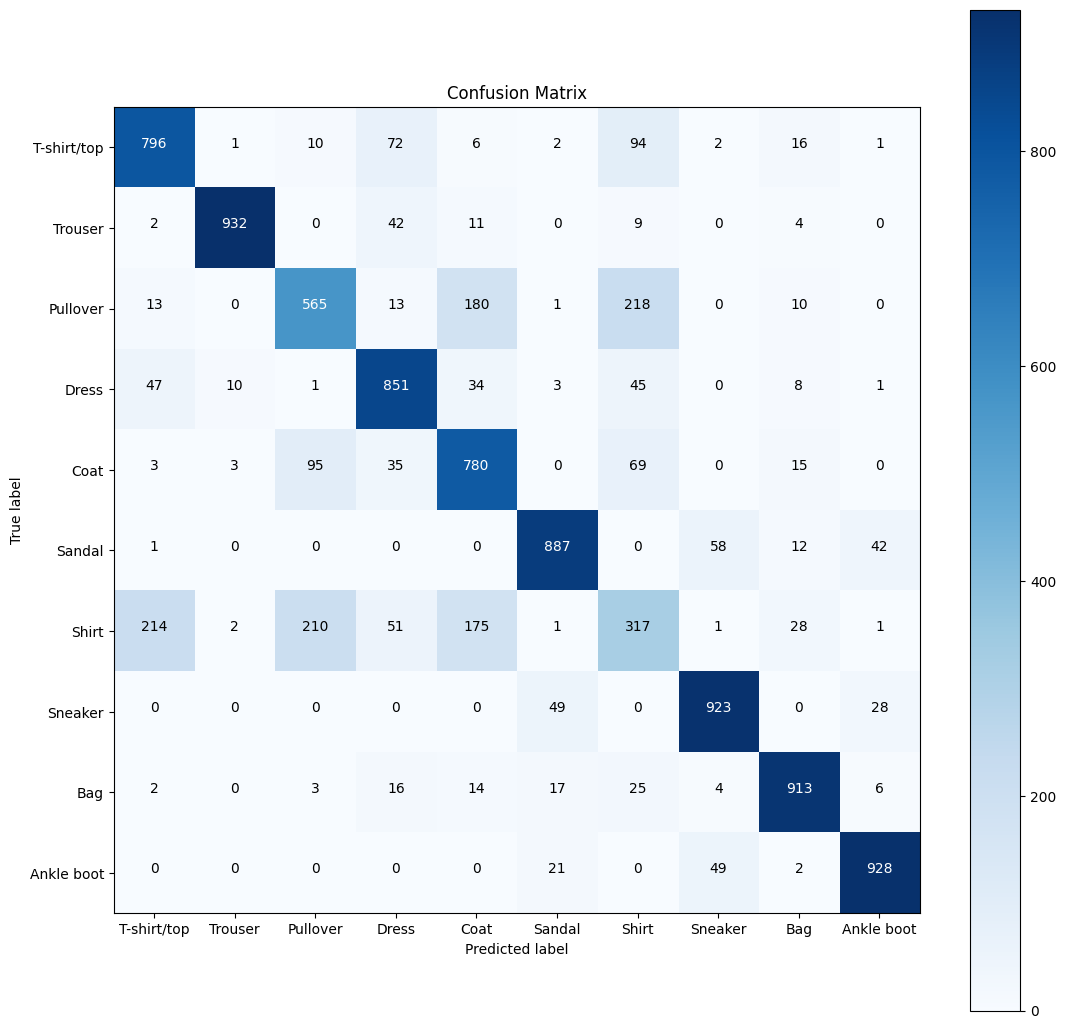

In [26]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(13,13),
                      text_size=10)


Lets plot a random image along with its prediction.

In [27]:
from helper_functions import plot_random_image

1/1 [==============================] - 0s 16ms/step


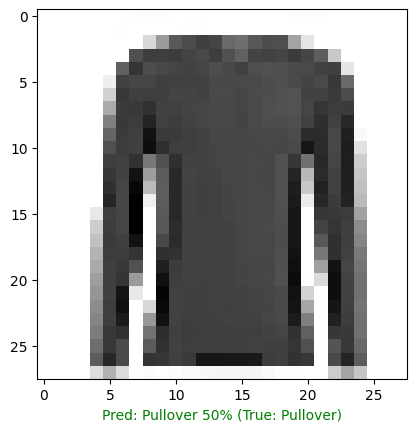

In [28]:
# Check out a random image as well as its prediction
plot_random_image(model=model_2,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [29]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


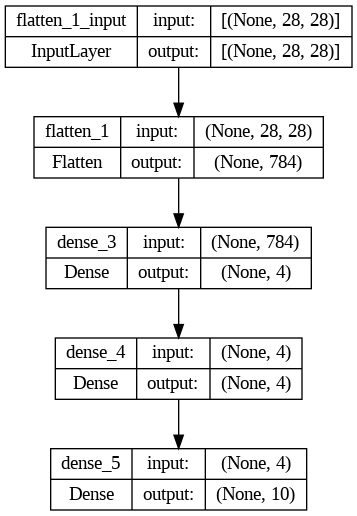

In [31]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_2, show_shapes=True)